###  Ботов А.В. 17-АС ###
### Вариант 5. ###

Метеоритная защита земли.
1. Определите местоположение появления метеорита с наибольшим количеством высвободившейся энергии.
2. Определите метеорит с максимальной и минимальной скоростью.
3. Определите место максимальной концентрации метеоритов.
4. Определите время года, в которое вероятность появления метеоритов максимальна. Постройте график.
5. Удалите строки данных, в которых для метеоритов не указана скорость. Выведите размер набора данных до и после удаления.
6. Построить график, на котором по оси ОХ отложено время суток, по OY–частота появления метеоритов.
7. Заполните строки в которых для метеоритов не указана скорость.
8. Определите месяц года, для которого появление метеоритов наиболее вероятно (постройте необходимые графики).
9. Вычислите корреляцию Пирсона и Спирмена между признаками Altitude и TotalRadiatedEnergy. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
fireball=pd.read_csv("cneos_fireball_data.csv", header=0, names=["date_time","latitude","longitude","altitude","velocity","vx","vy","vz","total_radiated_energy","calculated_total_impact_energy"])
fireball

,date_time,latitude,longitude,altitude,velocity,vx,vy,vz,total_radiated_energy,calculated_total_impact_energy
0,2017-07-31 22:01:35,24.7N,118.5W,NaN,NaN,NaN,NaN,NaN,5.800000e+10,0.190
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.120
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.230
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.290
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.520
...,...,...,...,...,...,...,...,...,...,...
714,1993-11-29 17:48:41,26.5N,78.3E,NaN,NaN,NaN,NaN,NaN,2.600000e+10,0.092
715,1993-10-31 03:39:27,51.3N,100.9W,NaN,NaN,NaN,NaN,NaN,4.000000e+10,0.130
716,1991-10-04 09:22:47,78.7N,6.3E,NaN,NaN,NaN,NaN,NaN,5.500000e+11,1.400
717,1990-10-01 03:51:47,7.5N,142.8E,NaN,NaN,NaN,NaN,NaN,2.500000e+12,5.200


**1.Определите местоположение появления метеорита с наибольшим количеством высвободившейся энергии.**

In [3]:
fireball.nlargest(1, ['total_radiated_energy']).head()

,date_time,latitude,longitude,altitude,velocity,vx,vy,vz,total_radiated_energy,calculated_total_impact_energy
146,2013-02-15 03:20:33,54.8N,61.1E,23.3,18.6,12.8,-13.3,-2.4,3.750000e+14,440.0


In [4]:
n=fireball.groupby(('latitude','longitude'))['total_radiated_energy'].max()
n.nlargest(1)

C:\Users\Temab\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


latitude  longitude
54.8N     61.1E        3.750000e+14
Name: total_radiated_energy, dtype: float64

**2. Определите метеорит с максимальной и минимальной скоростью.**

In [10]:
print("Fireball with max velocity:")
fireball.nlargest(1, ['velocity']).head()

Fireball with max velocity:


,date_time,latitude,longitude,altitude,velocity,vx,vy,vz,total_radiated_energy,calculated_total_impact_energy
67,2015-07-04 01:40:11,38.6N,103.1E,46.3,49.0,0.9,-40.4,-27.7,5.600000e+10,0.18


In [11]:
print("\nFireball with min velocity:")
fireball.nsmallest(1, ['velocity']).head()


Fireball with min velocity:


,date_time,latitude,longitude,altitude,velocity,vx,vy,vz,total_radiated_energy,calculated_total_impact_energy
300,2008-07-01 17:40:19,37.1N,115.7W,36.1,9.8,2.8,1.7,-9.2,3.600000e+10,0.12


**3. Определите место максимальной концентрации метеоритов.**

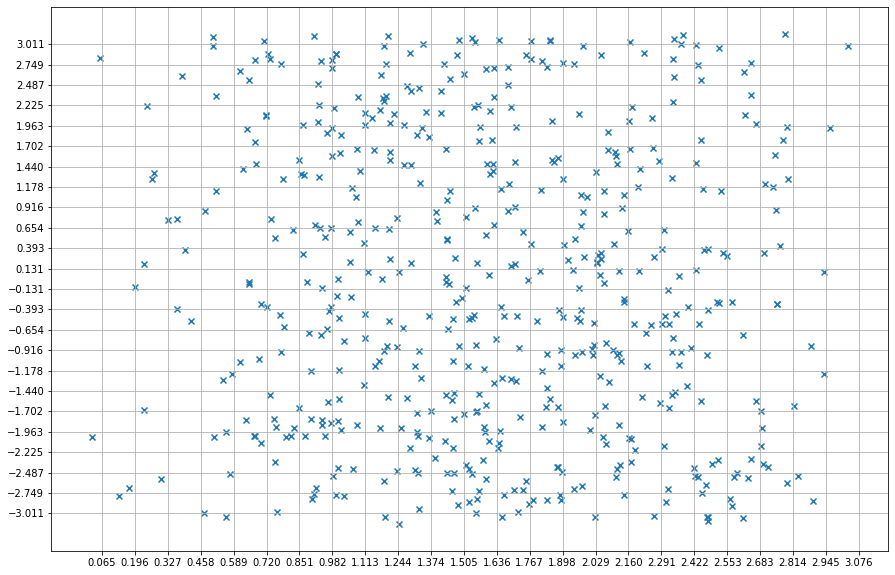

In [14]:
df_copy = fireball.dropna(subset=['latitude', 'longitude'])
latitude = df_copy['latitude'].apply(
    lambda lat: np.pi / 2 - np.radians(float(lat[:-1]) * (1 if lat[-1] == 'N' else -1)))
lat_bins = np.linspace(0, np.pi, 25)
lat_frequences, lat_bins = np.histogram(latitude, lat_bins)
lat_bins = (lat_bins[1:] + lat_bins[:-1])/2

longitude = df_copy['longitude'].apply(
    lambda lon: np.radians(float(lon[:-1]) * (1 if lon[-1] == 'W' else -1)))
lon_bins = np.linspace(-np.pi, np.pi, 25)
lon_frequences, lon_bins = np.histogram(longitude, lon_bins)
lon_bins = (lon_bins[1:] + lon_bins[:-1])/2

fig = plt.figure(figsize=(15,10))
ax = fig.gca()
ax.set_xticks(lat_bins)
ax.set_yticks(lon_bins)
plt.scatter(latitude, longitude, marker='x')
plt.grid()
plt.show()

**4. Определите время года, в которое вероятность появления метеоритов максимальна. Постройте график.**

autumn    0.253129
spring    0.250348
winter    0.248957
summer    0.247566
Name: season, dtype: float64
autumn is the time of year when probability of a meteorites is max


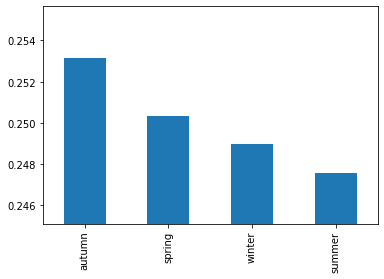

In [15]:
import re
def determine_season(date_time):
    
    month=int(re.search(r'-\d+-',date_time).group().strip("-"))
    return "winter" if month in [12,1,2] \
            else "spring" if month in [3,4,5] \
            else "summer" if month in [6,7,8] \
            else  "autumn"

fireball["season"]=fireball["date_time"].apply(determine_season)
probabilitys_series=fireball.season.value_counts(normalize=True)
print(probabilitys_series)
print("{} is the time of year when probability of a meteorites is max".format( \
    probabilitys_series.idxmax()))
probabilitys_series.plot(kind='bar', ylim=(probabilitys_series.min()*0.99, probabilitys_series.max()*1.01))

**5. Удалите строки данных, в которых для метеоритов не указана скорость. Выведите размер набора данных до и после удаления.**

In [21]:
print(fireball.shape)
copy_fireball=fireball.dropna(axis=0,subset=["velocity"])
print(copy_fireball.shape)

(719, 10)
(157, 10)


**6. Построить график, на котором по оси ОХ отложено время суток, по OY–частота появления метеоритов.**

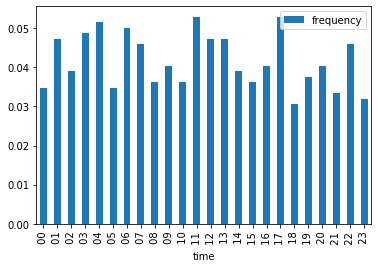

In [22]:
new_df=fireball.copy()
new_df["hour"]=new_df.date_time.apply(lambda dt: re.search(r' \d+:', dt).group().strip(':'))

graf_1=pd.DataFrame({'frequency': 
                   new_df.hour.value_counts(normalize=True),
                  'time': new_df.hour.value_counts(normalize=True).index})
graf_1.sort_values(by=['time'], inplace=True)
graf_1.plot(kind='bar', x='time', y='frequency')

**7. Заполните строки в которых для метеоритов не указана скорость.**

In [24]:
max_component=max(fireball.vx.max(), fireball.vy.max(), fireball.vz.max())
min_component=min(fireball.vx.min(), fireball.vy.min(), fireball.vz.min())

fireball.vx.fillna((max_component - min_component) * np.random.random_sample() + min_component,
                              inplace=True)
fireball.vy.fillna((max_component - min_component) * np.random.random_sample() + min_component,
                              inplace=True)
fireball.vz.fillna((max_component - min_component) * np.random.random_sample() + min_component,
                              inplace=True)

fireball.velocity.fillna(np.sqrt(fireball[fireball.velocity.isnull()].vx**2+\
                             fireball[fireball.velocity.isnull()].vy**2+\
                             fireball[fireball.velocity.isnull()].vz**2), inplace=True)
fireball

,date_time,latitude,longitude,altitude,velocity,vx,vy,vz,total_radiated_energy,calculated_total_impact_energy
0,2017-07-31 22:01:35,24.7N,118.5W,NaN,51.465451,17.617455,-40.940288,25.733456,5.800000e+10,0.190
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.200000,-0.400000,8.700000,-14.800000,3.500000e+10,0.120
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.700000,-10.000000,-6.500000,-6.800000,7.300000e+10,0.230
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.200000,10.900000,-9.700000,4.200000,9.400000e+10,0.290
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.300000,17.700000,13.100000,-10.300000,1.840000e+11,0.520
...,...,...,...,...,...,...,...,...,...,...
714,1993-11-29 17:48:41,26.5N,78.3E,NaN,51.465451,17.617455,-40.940288,25.733456,2.600000e+10,0.092
715,1993-10-31 03:39:27,51.3N,100.9W,NaN,51.465451,17.617455,-40.940288,25.733456,4.000000e+10,0.130
716,1991-10-04 09:22:47,78.7N,6.3E,NaN,51.465451,17.617455,-40.940288,25.733456,5.500000e+11,1.400
717,1990-10-01 03:51:47,7.5N,142.8E,NaN,51.465451,17.617455,-40.940288,25.733456,2.500000e+12,5.200


**8. Определите месяц года, для которого появление метеоритов наиболее вероятно (постройте необходимые графики).**

October is the month of the year for which meteorites are most likely
Probability - 0.09040333796940195


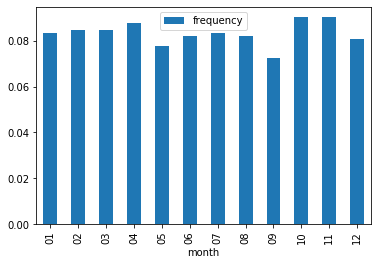

In [26]:
new_df=fireball.copy()
months={ 1:'January',
         2:'February',
         3:'March',
         4:'April',
         5:'May',
         6:'June',
         7:'July',
         8:'Auqust',
         9:'September',
         10:'October',
         11:'Nobember',
         12:'December',}
new_df["month"]=new_df.date_time.apply(lambda dt: re.search(r'-\d+-',dt).group().strip("-"))

series=new_df.groupby(by=['month'])['month'].count()
print('{} is the month of the year for which meteorites are most likely'.format(months[int(series.idxmax())]))
print('Probability - {}'.format(series.max()/fireball.shape[0]))
graf=pd.DataFrame(series.values/fireball.shape[0], columns=['frequency'], index=series.index)

graf.plot(kind='bar')

**9. Вычислите корреляцию Пирсона и Спирмена между признаками Altitude и TotalRadiatedEnergy. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.**

In [31]:
from scipy.stats import pearsonr as prs
fireball.dropna(subset=['altitude','total_radiated_energy'], inplace=True)
prs_corr, prs_pvalue = prs(fireball.altitude, fireball.total_radiated_energy)
print('correlation  {}\npvalue  {}'.format(prs_corr,prs_pvalue))

correlation  -0.08578656525823586
pvalue  0.13368269878711372


In [32]:
from scipy.stats import spearmanr as spr
spr_corr, spr_pvalue = spr(fireball.altitude, fireball.total_radiated_energy)
print('correlation  {}\npvalue  {}'.format(spr_corr,spr_pvalue))

correlation  -0.12671041939219074
pvalue  0.026415728610676672


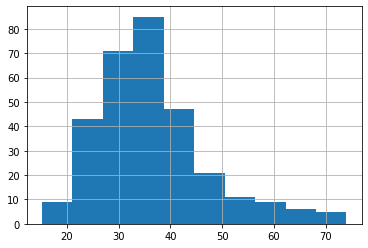

In [33]:
fireball.altitude.hist()

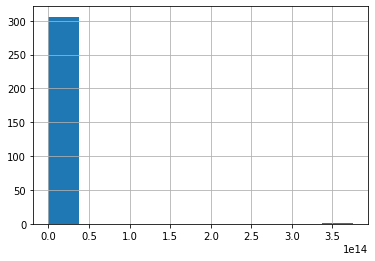

In [34]:
fireball.total_radiated_energy.hist()